In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from sklearn import datasets

from sklearn.model_selection import train_test_split


#importing dataset
diab = datasets.load_diabetes()

#definine feature and label
features = diab['data']
label = diab['target']

#printing shapes
print(features.shape, label.shape)


(442, 10) (442,)


In [11]:
X = pd.DataFrame(features, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])
X = sm.add_constant(X)
X.describe()

,const,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
count,442.0,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,1.0,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,0.0,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,1.0,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,1.0,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,1.0,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,1.0,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.0,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [12]:
y = pd.DataFrame(label, columns=["progression"])

y.describe()

,progression
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


Create splitting function

In [13]:
def my_splitter(my_X, my_y, percent_train: int):
  print(f"\n -----------Splitting with {percent_train}% of data in the training set -----------\n")

  my_X_train, my_X_test, my_y_train, my_y_test = train_test_split(my_X, 
                                                                  my_y, 
                                                                  test_size =percent_train / 100, 
                                                                  random_state=0)
  return my_X_train, my_X_test, my_y_train, my_y_test

# test the function
X_train, X_test, y_train, y_test = my_splitter(X, y, 50)

#printing shapes
print(f"shape of X train/test = {X_train.shape}/{X_test.shape} \nshape of y train/test = {y_train.shape}/{y_test.shape}")


 -----------Splitting with 50% of data in the training set -----------

shape of X train/test = (221, 11)/(221, 11) 
shape of y train/test = (221, 1)/(221, 1)


Create model function

In [14]:
def model_iteration(my_X_train, my_X_test, my_y_train, my_y_test):
  model=sm.OLS(my_y_train,my_X_train).fit()
  print(model.summary())

  my_R2 = model.rsquared  # R2 is from the training dataset

  return model, my_R2

# test the function
current_model, current_R2 = model_iteration(X_train, X_test, y_train, y_test)
print(current_R2)

                            OLS Regression Results                            
Dep. Variable:            progression   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     28.19
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           9.50e-34
Time:                        22:53:47   Log-Likelihood:                -1187.7
No. Observations:                 221   AIC:                             2397.
Df Residuals:                     210   BIC:                             2435.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.3589      3.660     42.171      0.0

Starter code to create an object

In [15]:
train_percentage = 1
object_to_store = [train_percentage, current_model, current_R2]

object_to_store

[1,
 np.float64(0.57307272643494)]

Student code

In [16]:
master_list = []
# Loop through different training percentages
for per in range(1, 90):
    print(f"\nTraining with {per}% of data")
    X_train, X_test, y_train, y_test = my_splitter(X, y, per)
    model, R2 = model_iteration(X_train, X_test, y_train, y_test)
    
    # Store the results
    master_list.append([per, model, R2])


Training with 1% of data

 -----------Splitting with 1% of data in the training set -----------

                            OLS Regression Results                            
Dep. Variable:            progression   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     45.25
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           7.24e-61
Time:                        22:53:47   Log-Likelihood:                -2359.2
No. Observations:                 437   AIC:                             4740.
Df Residuals:                     426   BIC:                             4785.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Display a portion of master_list

In [17]:
master_list

[[1,
  np.float64(0.5150624337003415)],
 [2,
  np.float64(0.5133455622019324)],
 [3,
  np.float64(0.5193333912435321)],
 [4,
  np.float64(0.5156628699622308)],
 [5,
  np.float64(0.5207096346076976)],
 [6,
  np.float64(0.5259995245190638)],
 [7,
  np.float64(0.5248874410498378)],
 [8,
  np.float64(0.5304512749245252)],
 [9,
  np.float64(0.530534917889449)],
 [10,
  np.float64(0.5302437544527459)],
 [11,
  np.float64(0.5311373871028959)],
 [12,
  np.float64(0.5311404289486596)],
 [13,
  np.float64(0.5329837078870548)],
 [14,
  np.float64(0.5454932091127775)],
 [15,
  np.float64(0.5549942374158906)],
 [16,
  np.float64(0.5525408332333932)],
 [17,
  np.float64(0.5536238773516902)],
 [18,
  np.float64(0.5542322044834526)],
 [19,
  np.float64(0.5530114161203821)],
 [20,
  np.float64(0.5539250081377072)],
 [21,
  np.float64(0.5539311584363131)],
 [22,
  np.float64(0.5520124512165945)],
 [23,
  np.float64(0.552807416157896)],
 [24,
  np.float64(0.5557698624399056)],
 [25,
  np.float64(0.555433

Premade plotting routine

[Text(0, 0.5, 'R2')]

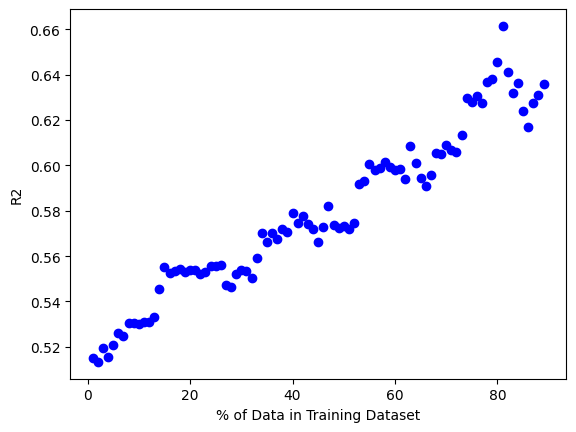

In [18]:
fig, ax = plt.subplots()

for z in range(len(master_list)):
  ax.plot(master_list[z][0],
          master_list[z][2], 
          "bo")   # bo gives a blue dot

ax.set(xlabel = "% of Data in Training Dataset")
ax.set(ylabel = "R2")

# plt.show()
